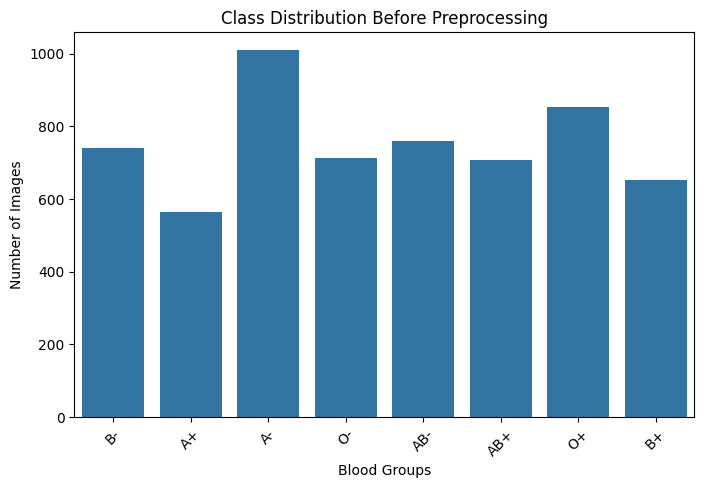

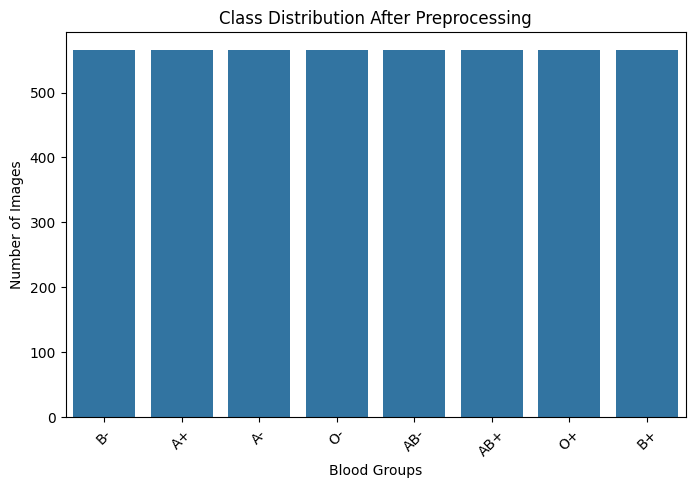

Found 3616 images belonging to 8 classes.
Found 904 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.3914 - loss: 1.9269 - val_accuracy: 0.7887 - val_loss: 0.5362
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.8094 - loss: 0.4879 - val_accuracy: 0.8418 - val_loss: 0.3707
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.8701 - loss: 0.3274 - val_accuracy: 0.8374 - val_loss: 0.4222
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9058 - loss: 0.2457 - val_accuracy: 0.8662 - val_loss: 0.3415
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.9216 - loss: 0.2156 - val_accuracy: 0.8462 - val_loss: 0.3639
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9244 - loss: 0.1881 - val_accuracy: 0.8595 - val_loss: 0.3871
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9383 - loss: 0.1540 - val_accuracy: 0.8861 - val_loss: 0.3190
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9718 - loss: 0.0831 - val_accu

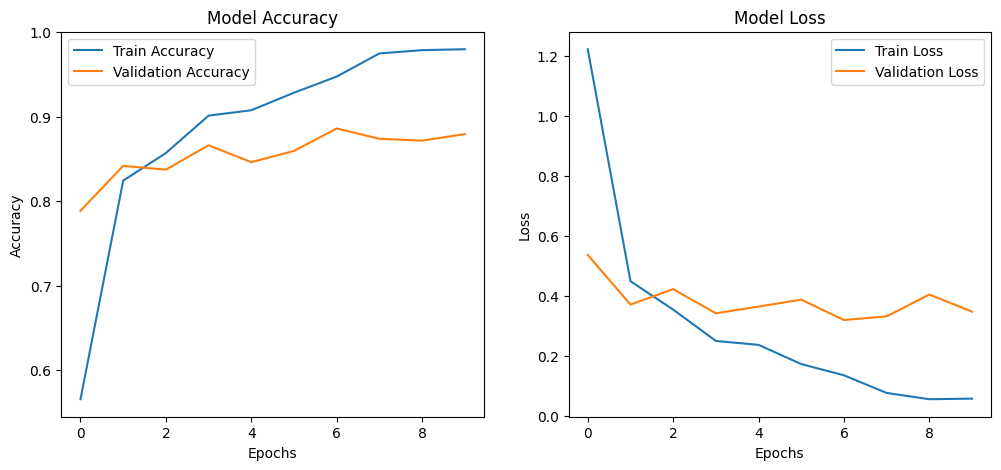

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 381ms/step - accuracy: 0.8987 - loss: 0.3120
✅ Model Test Accuracy: 0.88
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 402ms/step
✅ Classification Report:
              precision    recall  f1-score   support

          A+       0.91      0.94      0.92       113
          A-       0.81      0.89      0.85       113
         AB+       0.87      0.94      0.90       113
         AB-       0.93      0.75      0.83       113
          B+       0.90      0.93      0.91       113
          B-       0.82      0.94      0.88       113
          O+       0.93      0.79      0.85       113
          O-       0.90      0.86      0.88       113

    accuracy                           0.88       904
   macro avg       0.88      0.88      0.88       904
weighted avg       0.88      0.88      0.88       904



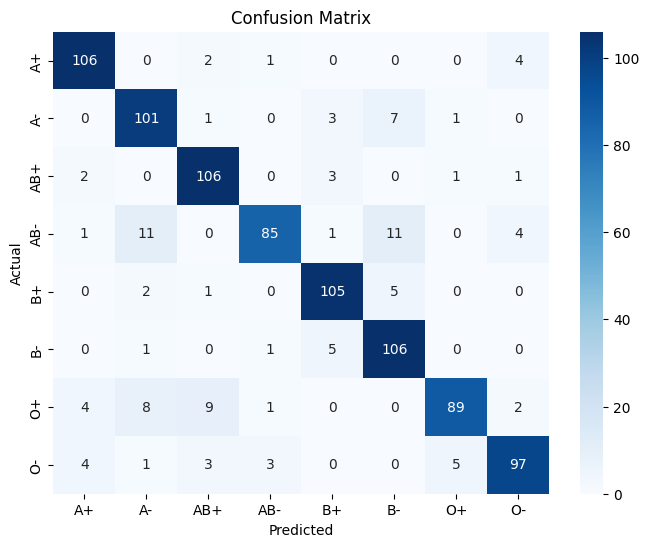

In [3]:
import os
import zipfile
import shutil
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ UNZIP DATASET
DATASET_PATH = "dataset"
ARCHIVE_PATH = "archive.zip"

if not os.path.exists(DATASET_PATH):
    with zipfile.ZipFile(ARCHIVE_PATH, "r") as zip_ref:
        zip_ref.extractall(DATASET_PATH)

# ✅ DEFINE DIRECTORIES
ORIGINAL_DATASET = os.path.join(DATASET_PATH, "dataset_blood_group")
BALANCED_DATASET = os.path.join(DATASET_PATH, "balanced_blood_group")
TRAIN_DIR = os.path.join(DATASET_PATH, "train")
TEST_DIR = os.path.join(DATASET_PATH, "test")

# ✅ STEP 1: PLOT CLASS DISTRIBUTION BEFORE PREPROCESSING
def plot_class_distribution(data_dir, title):
    class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir)}
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title(title)
    plt.xlabel("Blood Groups")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(ORIGINAL_DATASET, "Class Distribution Before Preprocessing")

# ✅ STEP 2: BALANCE DATASET (EQUAL IMAGES PER CLASS)
os.makedirs(BALANCED_DATASET, exist_ok=True)

# Find minimum number of images in any class
min_images = min([len(os.listdir(os.path.join(ORIGINAL_DATASET, cls))) for cls in os.listdir(ORIGINAL_DATASET)])

# Copy equal number of images for each class
for cls in os.listdir(ORIGINAL_DATASET):
    class_path = os.path.join(ORIGINAL_DATASET, cls)
    images = os.listdir(class_path)
    random.shuffle(images)
    images = images[:min_images]  # Take only 'min_images' per class

    os.makedirs(os.path.join(BALANCED_DATASET, cls), exist_ok=True)
    for img in images:
        img_path = os.path.join(class_path, img)
        if os.path.isfile(img_path):  # Ensure it's a file
            shutil.copy(img_path, os.path.join(BALANCED_DATASET, cls))

plot_class_distribution(BALANCED_DATASET, "Class Distribution After Preprocessing")

# ✅ STEP 3: SPLIT DATASET (80% TRAIN, 20% TEST)
if not os.path.exists(TRAIN_DIR) and not os.path.exists(TEST_DIR):
    os.makedirs(TRAIN_DIR, exist_ok=True)
    os.makedirs(TEST_DIR, exist_ok=True)

    for cls in os.listdir(BALANCED_DATASET):
        class_path = os.path.join(BALANCED_DATASET, cls)
        images = os.listdir(class_path)
        random.shuffle(images)

        split_idx = int(0.8 * len(images))
        train_imgs, test_imgs = images[:split_idx], images[split_idx:]

        os.makedirs(os.path.join(TRAIN_DIR, cls), exist_ok=True)
        os.makedirs(os.path.join(TEST_DIR, cls), exist_ok=True)

        for img in train_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(TRAIN_DIR, cls))

        for img in test_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(TEST_DIR, cls))

# ✅ STEP 4: IMAGE DATA GENERATORS
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical", shuffle=False
)

num_classes = len(train_generator.class_indices)

# ✅ STEP 5: BUILD & TRAIN MODEL
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# ✅ STEP 6: PLOT ACCURACY & LOSS CURVES
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ✅ STEP 7: EVALUATE MODEL
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"✅ Model Test Accuracy: {test_accuracy:.2f}")

# ✅ STEP 8: CONFUSION MATRIX & CLASSIFICATION REPORT
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

class_labels = list(test_generator.class_indices.keys())

print("✅ Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
